In [1]:
import dev
import s3
import pandas as pd
import geopandas as gpd

In [2]:
france = dev.get_shapefile_ign(level = "COMMUNE", field = "metropole").to_crs(2154)
martinique = dev.get_shapefile_ign(level = "COMMUNE", field = "martinique").to_crs(2154)
reunion = dev.get_shapefile_ign(level = "COMMUNE", field = "reunion").to_crs(2154)
guadeloupe = dev.get_shapefile_ign(level = "COMMUNE", field = "guadeloupe").to_crs(2154)
guyane = dev.get_shapefile_ign(level = "COMMUNE", field = "guyane").to_crs(2154)

Data have been previously downloaded and are still available in /tmp/EXPRESS-COG-2022
Data have been previously downloaded and are still available in /tmp/EXPRESS-COG-2022
Data have been previously downloaded and are still available in /tmp/EXPRESS-COG-2022
Data have been previously downloaded and are still available in /tmp/EXPRESS-COG-2022
Data have been previously downloaded and are still available in /tmp/EXPRESS-COG-2022


In [2]:
s3.write_shapefile_s3_all()

Data have been previously downloaded and are still available in /tmp/EXPRESS-COG-2022
Data have been previously downloaded and are still available in /tmp/EXPRESS-COG-2022
Data have been previously downloaded and are still available in /tmp/EXPRESS-COG-2022
Data have been previously downloaded and are still available in /tmp/EXPRESS-COG-2022
Data have been previously downloaded and are still available in /tmp/EXPRESS-COG-2022


TypeError: string indices must be integers

In [12]:
france[var_decoupage].unique()

array(['84', '76', '53', '75', '28', '93', '52', '44', '27', '11', '24',
       '32', '94'], dtype=object)

In [64]:
s3 = reload(s3)

In [19]:
s3.write_shapefile_subset(france_complete, "28")
#s3.write_shapefile_subset(france_complete, "11")
#s3.write_shapefile_subset(france_complete, "84")

In [65]:
from importlib import reload
s3 = reload(s3)

In [66]:
#s3.write_shapefile_subset(france_complete, "28", shapefile_format="geoJSON")
#s3.write_shapefile_subset(france_complete, "28", shapefile_format = "gpkg")
s3.write_shapefile_subset(france_complete, "28", shapefile_format = "shp")


When using shp format, we first need a local temporary save


In [44]:
#s3.write_shapefile_subset(france_complete, "28", shapefile_format = "shp")
write_path = s3.create_path_bucket(
        bucket=bucket,
        path_within_bucket=path_within_bucket,
        shapefile_format="shp",
        decoupage=decoupage,
        year=year,
        value=value
    )
write_path

'lgaliana/cartogether/shapefiles-test/2022/region/28/shp/'

In [48]:
    object_subset = s3.keep_subset_geopandas(
        france_complete,
        corresp_decoupage_columns["region"],
        "28")

'GeoJSON'

In [16]:
BUCKET = "lgaliana"
PATH_WITHIN_BUCKET = 'cartogether/shapefiles-test'

In [18]:
def write_shapefile_all_levels(
    object,
    level_var,
    shapefile_format="geojson",
    decoupage="region",
    year=2022,
    bucket=BUCKET,
    path_within_bucket=PATH_WITHIN_BUCKET,
):

    [s3.write_shapefile_subset(
        object,
        shapefile_format=shapefile_format,
        decoupage=decoupage,
        year=year,
        bucket=bucket,
        path_within_bucket=path_within_bucket,
        value = level) for level in object[level_var].unique()
    ]

In [20]:
    object,
    level_var,
    shapefile_format="geojson",
    decoupage="region",
    year=2022,
    bucket=BUCKET,
    path_within_bucket=PATH_WITHIN_BUCKET,
)

write_shapefile_all_levels(france, var_decoupage)

In [6]:
s3.write_shapefile_subset(france_complete, decoupage = "departement" , value = "31")

In [11]:
object = france_complete
value="28"
shapefile_format="geojson"
decoupage="region"
year=2022
BUCKET = "lgaliana"
PATH_WITHIN_BUCKET = 'cartogether/shapefiles-test'
bucket=BUCKET
path_within_bucket = PATH_WITHIN_BUCKET

In [12]:
    corresp_decoupage_columns = {
        "region": 'INSEE_REG',
        "departement": "INSEE_DEP",
        "commune": "INSEE_COM"
        }
    
    format_standardized = {
        "geojson": 'geojson',
        "geopackage": "GPKG",
        "gpkg": "GPKG"
    }

    gpd_driver = {
        "geojson": "GeoJSON",
        "GPKG": "GPKG"
    }

    format_write = format_standardized[shapefile_format.lower()]
    driver = gpd_driver[format_write]

    write_path = s3.create_path_bucket(
        bucket=bucket,
        path_within_bucket=path_within_bucket,
        shapefile_format=format_write,
        decoupage=decoupage,
        year=year,
        value=value
    )

<AxesSubplot:>

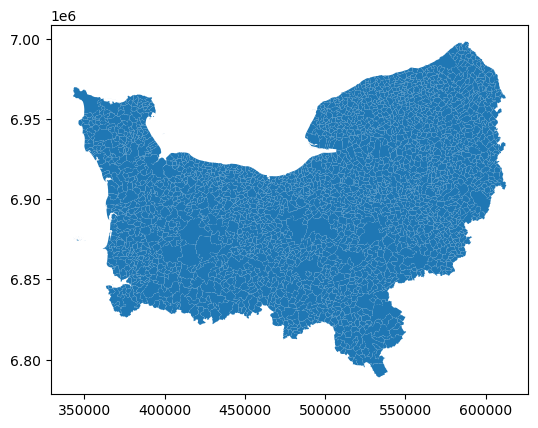

In [4]:
toto = gpd.read_file(
    s3.open_shapefile_from_s3(
        shapefile_format = "geojson",
        decoupage = "region",
        year = 2022,
        value = "28"
        )
    )
toto.plot()

<AxesSubplot:>

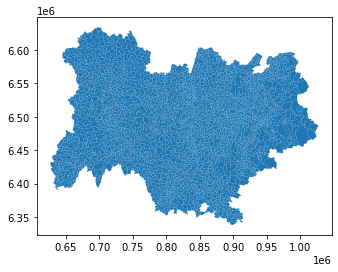

In [9]:
toto = gpd.read_file(
    s3.open_shapefile_from_s3(
        shapefile_format = "geojson",
        decoupage = "region",
        year = 2022,
        value = 84
        )
    )
toto.plot()

Requested file has been saved at location normandie.geojson


<AxesSubplot:>

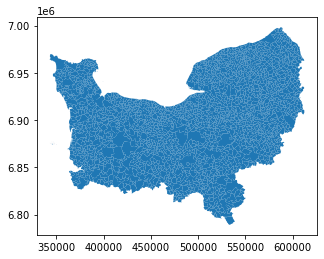

In [10]:
s3.write_shapefile_from_s3(
    #shapefile_format = "geojson",
    decoupage = "region",
    year = 2022, 
    value = 28,
    filename = "normandie.geojson"
)
toto = gpd.read_file("normandie.geojson")
toto.plot()

<AxesSubplot:>

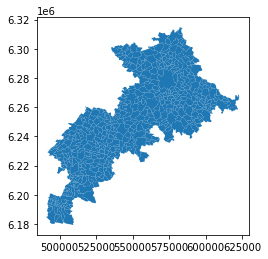

In [11]:
toto = gpd.read_file(
    s3.open_shapefile_from_s3(
        shapefile_format = "geojson",
        decoupage = "departement",
        year = 2022,
        value = 31
        )
    )
toto.plot()